## Analiza letalskih nesreč

#### Priprava podatkov

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

PlaneCrashes = "./Podatki/PlaneCrashes.csv"
reader = csv.DictReader(open(PlaneCrashes, 'rt', encoding='utf-8'))

#sample = csv.DictReader(open("./Podatki/sample.csv", 'rt', encoding='utf-8'))


### 1. Kako se število nesreč spreminja skozi čas?

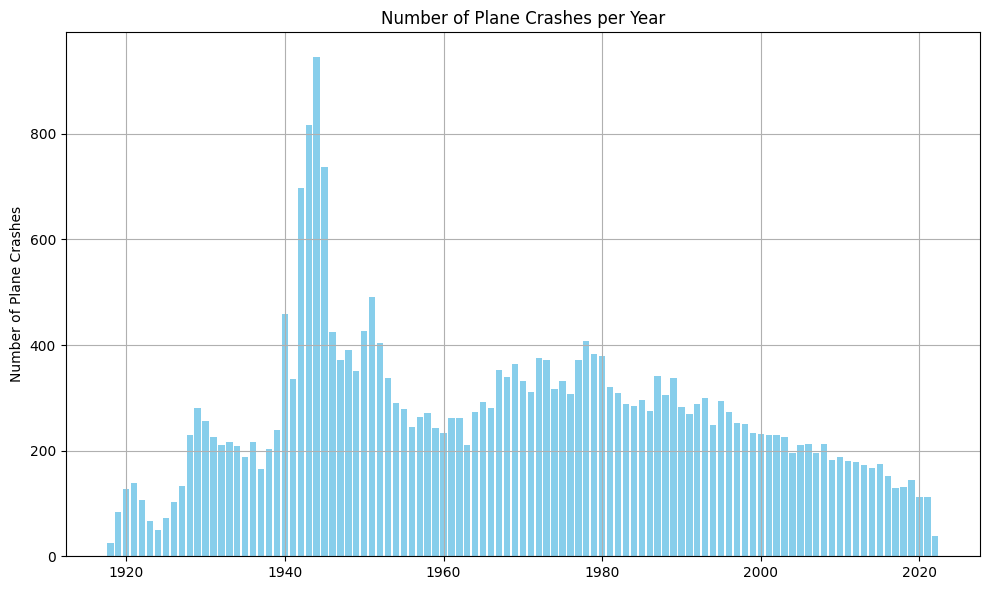

In [2]:
types = {}
for row in reader:
    flight_type = row['Flight type']
    if flight_type.strip():
        types[flight_type] = types.get(flight_type, 0) + 1
    else:
        types['NA'] = types.get('NA', 0) + 1

sorted_types = sorted(types.keys(), key=lambda k: types[k], reverse=True)

flight_types_dict = {}
top_10_types = set(sorted_types[:10])

total_years = defaultdict(int)

for type in top_10_types:
    flight_types_dict[type] = defaultdict(int)

reader = csv.DictReader(open("./Podatki/PlaneCrashes.csv", 'rt', encoding='utf-8'))

for row in reader:
    datum = datetime.strptime(row['Date'], '%Y-%m-%d %H:%M:%S')
    flight_type = row['Flight type']
    if (flight_type in top_10_types):
        flight_types_dict[flight_type][datum.year] += 1
    total_years[datum.year] += 1

x = list(total_years.keys())
y_total = [total_years[year] for year in x]

plt.figure(figsize=(10, 6))

plt.ylabel('Number of Plane Crashes')
plt.title('Number of Plane Crashes per Year')

bars_total_crashes = plt.bar(x, y_total, color='skyblue', label='Total Crashes')

plt.grid(True)

plt.tight_layout()

plt.show()

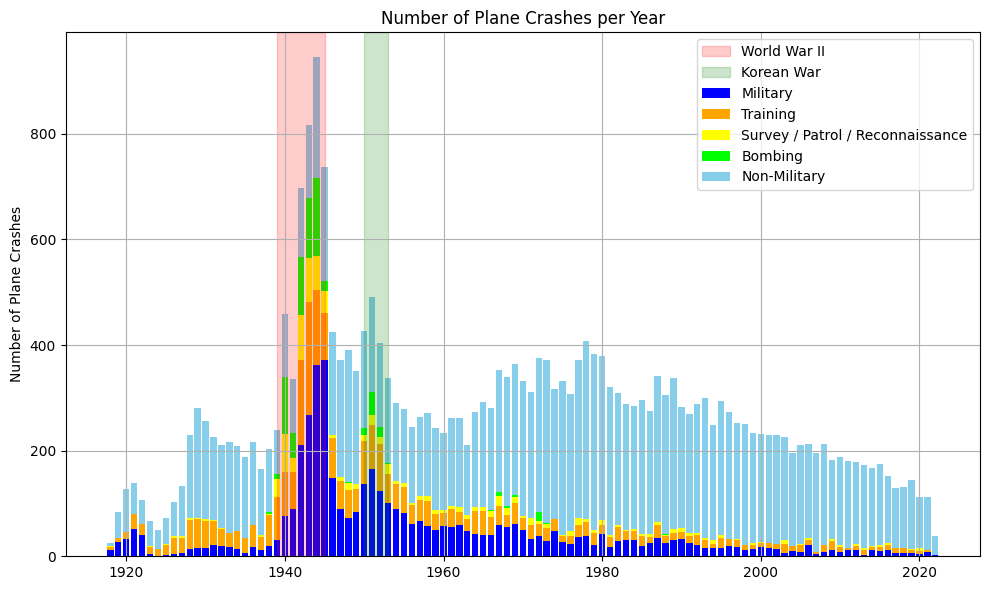

In [3]:
y_military = [flight_types_dict["Military"][year] for year in x]
y_training = [flight_types_dict["Training"][year] for year in x]
y_bombing = [flight_types_dict["Bombing"][year] for year in x]
y_survey = [flight_types_dict["Survey / Patrol / Reconnaissance"][year] for year in x]

plt.figure(figsize=(10, 6))

bars_military = plt.bar(x, y_military, color='blue', label='Military')
bars_training = plt.bar(x, y_training, bottom=y_military, color='orange', label='Training')
bars_survey = plt.bar(x, y_survey, bottom=np.array(y_military) + np.array(y_training), color='yellow', label='Survey / Patrol / Reconnaissance')
bars_bombing = plt.bar(x, y_bombing, bottom=np.array(y_military) + np.array(y_training) + np.array(y_survey), color='lime', label='Bombing')

non_military_y = np.array(y_total) - np.array(y_military) - np.array(y_training) - np.array(y_bombing) - np.array(y_survey)
non_military_bottom = np.array(y_military) + np.array(y_training) + np.array(y_bombing) + np.array(y_survey)
bars_non_military = plt.bar(x, non_military_y, bottom=non_military_bottom, color='skyblue', label='Non-Military')


important_events = {
    "World War II": (1939, 1945),
    "Korean War": (1950, 1953)
}

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'cyan', 'magenta', 'yellow', 'lime', 'pink', 'teal', 'lavender']
color_map = {event: color for event, color in zip(important_events.keys(), colors)}

for event, years_range in important_events.items():
    plt.axvspan(years_range[0], years_range[1], color=color_map[event], alpha=0.2)

legend_labels = []

for event in important_events.keys():
    legend_labels.append(event)

legend_labels.extend(['Military', 'Training', 'Survey / Patrol / Reconnaissance', 'Bombing', 'Non-Military'])

plt.ylabel('Number of Plane Crashes')
plt.title('Number of Plane Crashes per Year')

plt.grid(True)
plt.legend(legend_labels, loc='upper right')

plt.tight_layout()
plt.show()

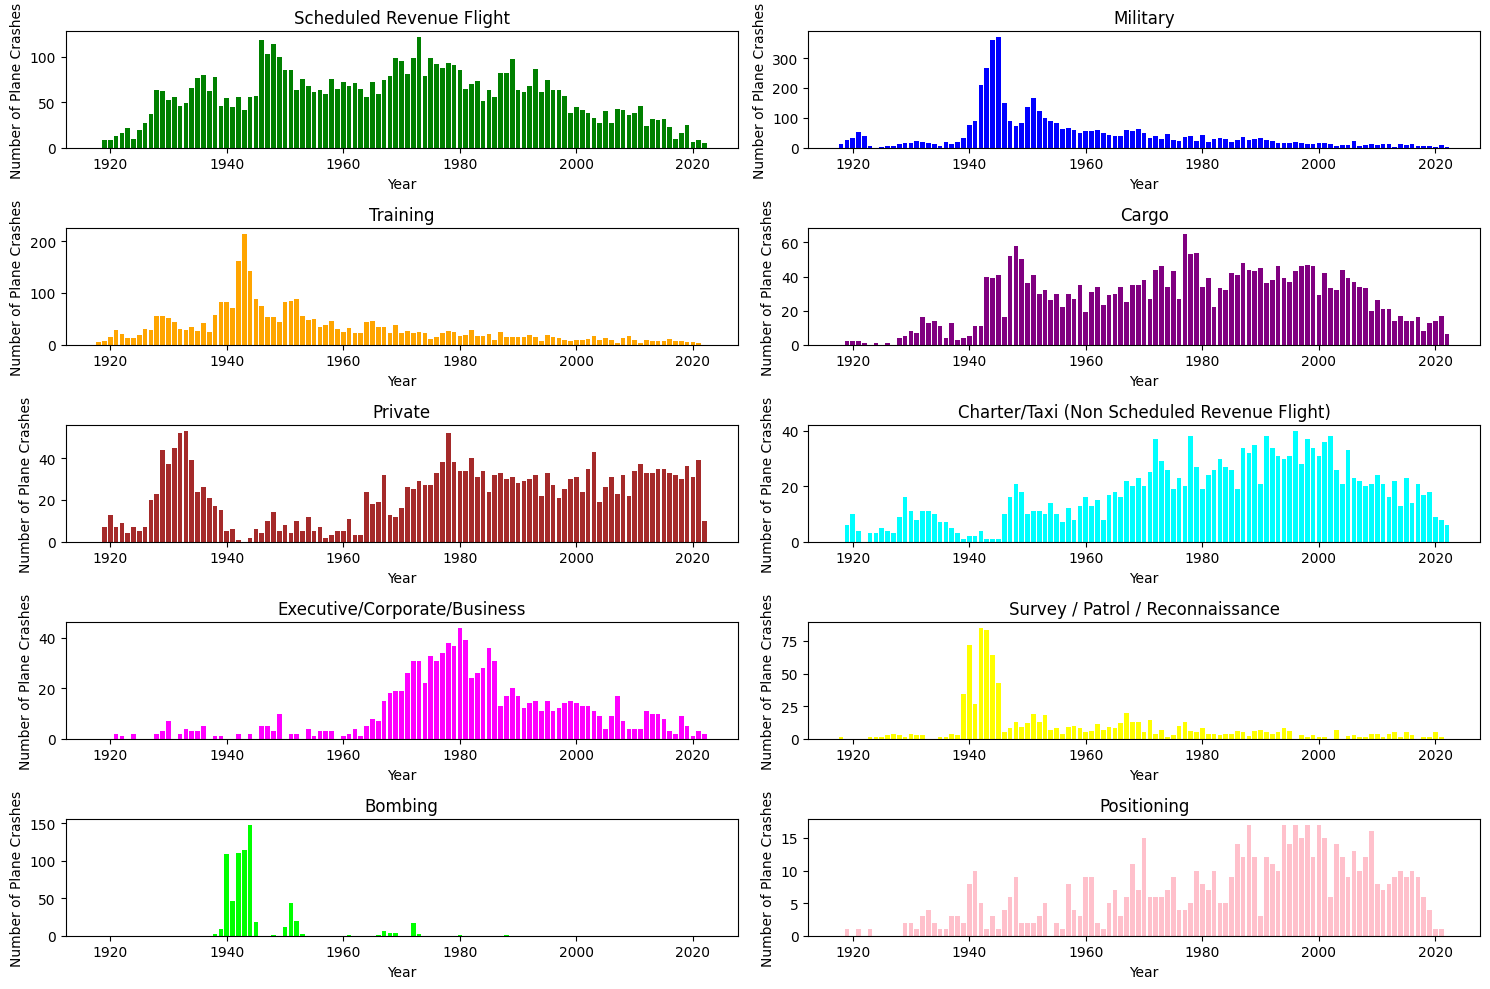

In [4]:
top_10_types = sorted_types[:10]

plt.figure(figsize=(15, 10))

for i, type in enumerate(top_10_types, 1):
    plt.subplot(5, 2, i)
    for year in x:
        plt.bar(year, flight_types_dict[type][year], color=colors[i])
    plt.title(type)
    plt.xlabel('Year')
    plt.ylabel('Number of Plane Crashes')

plt.tight_layout()
plt.show()

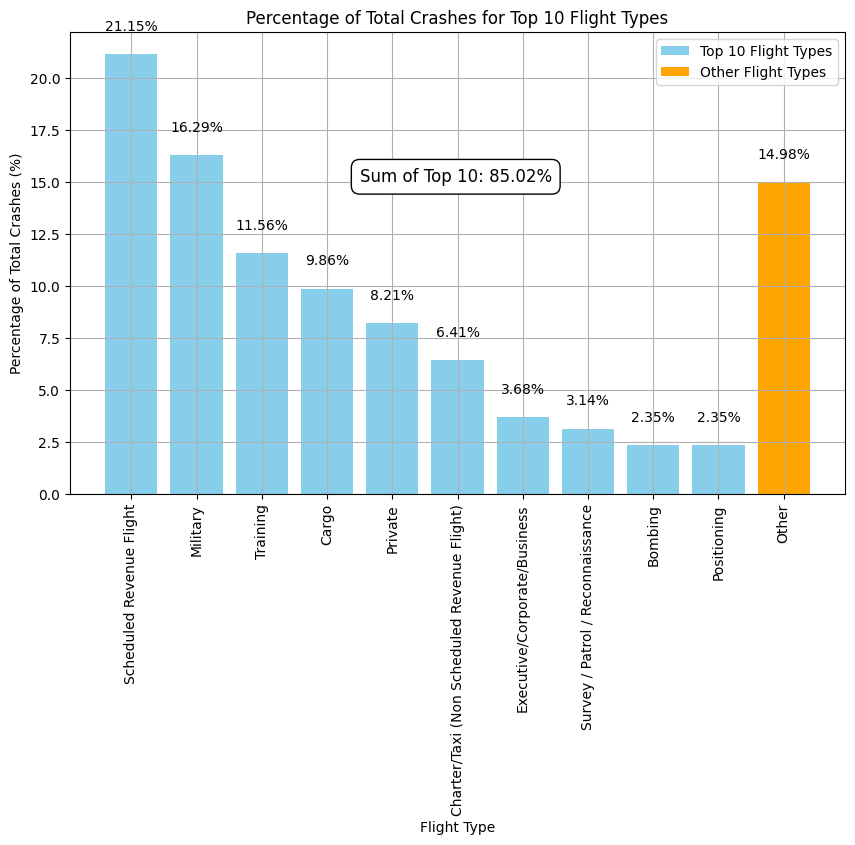

In [5]:
percentages = [(types[flight_type] / (sum(total_years.values()))) * 100 for flight_type in top_10_types]
sum_percentages_top_10 = sum(percentages)
percentage_other = 100 - sum_percentages_top_10

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_types, percentages, color='skyblue', label='Top 10 Flight Types')
plt.bar('Other', percentage_other, color='orange', label='Other Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Percentage of Total Crashes (%)')
plt.title('Percentage of Total Crashes for Top 10 Flight Types')
plt.xticks(rotation=90)
plt.grid(True)

for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.text('Other', percentage_other + 1, f'{percentage_other:.2f}%', ha='center', va='bottom')

sum_label = f'Sum of Top 10: {sum_percentages_top_10:.2f}%'
plt.text(3.5, 15, sum_label, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.legend()
plt.show()

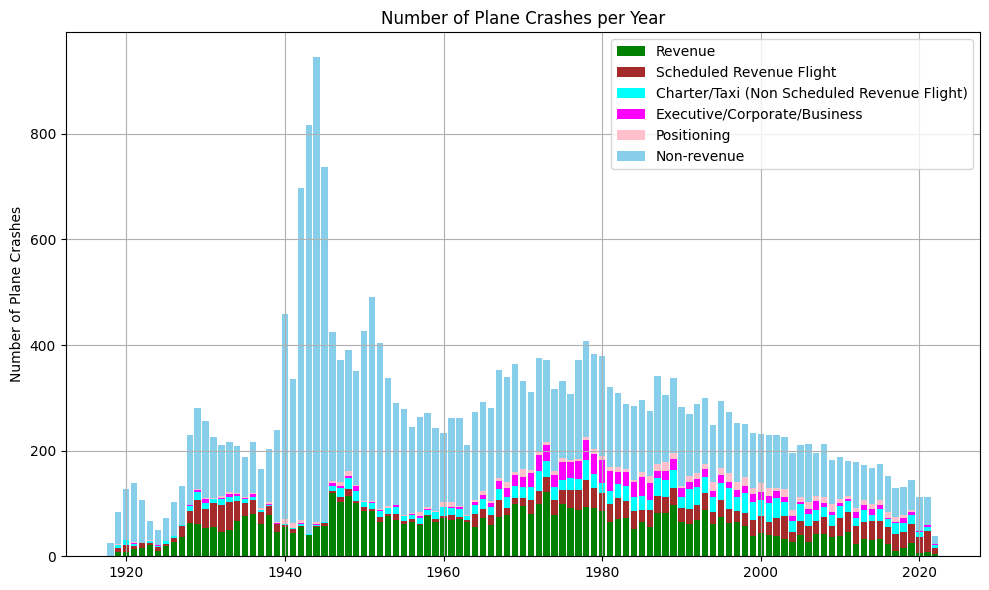

In [6]:
y_revenue = [flight_types_dict["Scheduled Revenue Flight"][year] for year in x]
y_taxi = [flight_types_dict["Charter/Taxi (Non Scheduled Revenue Flight)"][year] for year in x]
y_business = [flight_types_dict["Executive/Corporate/Business"][year] for year in x]
y_private = [flight_types_dict["Private"][year] for year in x]
y_positioning = [flight_types_dict["Positioning"][year] for year in x]

plt.figure(figsize=(10, 6))

bars_revenue = plt.bar(x, y_revenue, color='green', label='Revenue')
bars_private = plt.bar(x, y_private, bottom=y_revenue, color='brown', label='Scheduled Revenue Flight')
bars_taxi = plt.bar(x, y_taxi, bottom=np.array(y_private) + np.array(y_revenue), color='cyan', label='Charter/Taxi (Non Scheduled Revenue Flight)')
bars_business = plt.bar(x, y_business, bottom=np.array(y_taxi) + np.array(y_private) + np.array(y_revenue), color='magenta', label='Executive/Corporate/Business')
bars_positioning = plt.bar(x, y_positioning, bottom=np.array(y_taxi) + np.array(y_private) + np.array(y_revenue) + np.array(y_business), color='pink', label='Positioning')

non_revenue_y = np.array(y_total) - np.array(y_taxi) - np.array(y_private) - np.array(y_revenue) - np.array(y_business) - np.array(y_positioning)
non_revenue_bottom = np.array(y_taxi) + np.array(y_private) + np.array(y_revenue) + np.array(y_business) + np.array(y_positioning)
bars_non_revenue = plt.bar(x, non_revenue_y, bottom=non_revenue_bottom, color='skyblue', label='Non-revenue')

plt.ylabel('Number of Plane Crashes')
plt.title('Number of Plane Crashes per Year')

plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### 2. Ali in kako faze, v katerih se je zgodila nesreča, in vrste letov (komercialni, vojaški itd.) vplivajo na odstotek oz. število umrlih potnikov?

### 3. Ali in kako kraj nesreče in število potnikov vplivata na število smrtnih žrtev med ljudmi, ki niso bili potniki?

### 4. Katera letala so najbolj nevarna?

### 5. Ali in kateri modeli letal ter vrste letov so bolj nagnjeni k določenim vrstam nesreč (tehnična okvara, človeška napaka itd.)?

### 6. Kako ura vpliva na nesreče, ali se bolj pogosto dogajajo ponoči?

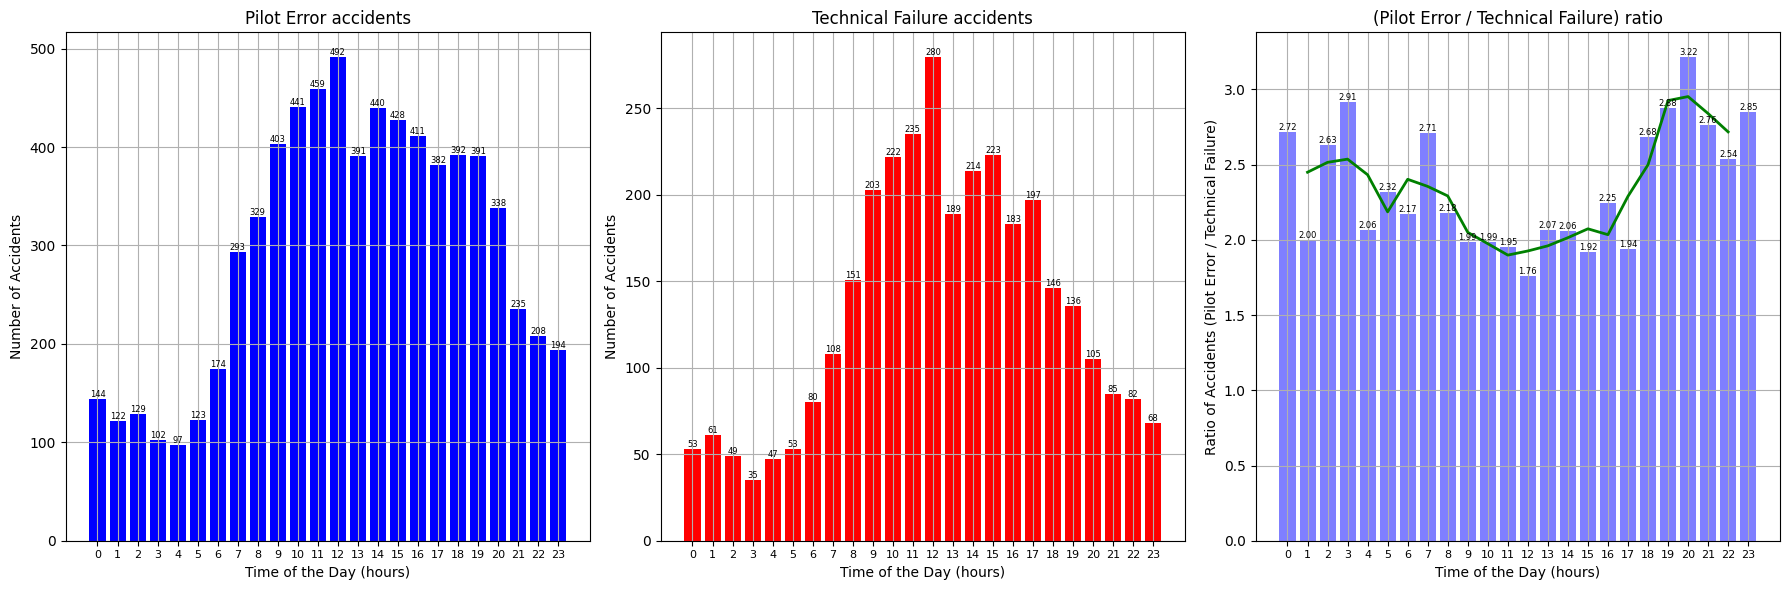

In [7]:
plt.rc('xtick', labelsize=8)

def read_data(cause):
    times = []
    with open(PlaneCrashes, 'rt', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Crash cause'] == cause and row['Time']:
                time_components = row['Time'].split(" ")
                try:
                    if 'H' in time_components[0]:
                        hour = int(time_components[0][:-1])
                    else:
                        hour = 0
                    times.append(hour)
                except ValueError:
                    print("Invalid time format, skipping:", row['Time'])
    return times

def plot_data(times, title, color='b'):
    unique_hours, counts = np.unique(times, return_counts=True)
    
    plt.bar(unique_hours, counts, color=color)
    plt.xlabel('Time of the Day (hours)')
    plt.ylabel('Number of Accidents')
    plt.title(title)
    plt.xticks(np.arange(0, 24, step=1))
    plt.grid(True)

    for i in range(len(unique_hours)):
        plt.text(unique_hours[i], counts[i], str(counts[i]), ha='center', va='bottom', fontsize=6)

def plot_ratio(pilot_error_times, technical_failure_times, window_size=3):
    pilot_error_counts = np.bincount(pilot_error_times).astype(float)  # Convert to float
    technical_failure_counts = np.bincount(technical_failure_times).astype(float)  # Convert to float
    
    ratio = np.divide(pilot_error_counts, technical_failure_counts, out=np.zeros_like(pilot_error_counts), where=technical_failure_counts!=0)
    smoothed_ratio = np.convolve(ratio, np.ones(window_size)/window_size, mode='valid')

    plt.bar(np.arange(24), ratio, color='b' if max(ratio) >= 1 else 'r', alpha=0.5)
    plt.plot(np.arange(window_size // 2, 24 - window_size // 2), smoothed_ratio, color='green', linestyle='-', linewidth=2)
    plt.xlabel('Time of the Day (hours)')
    plt.ylabel('Ratio of Accidents (Pilot Error / Technical Failure)')
    plt.title('(Pilot Error / Technical Failure) ratio')
    plt.xticks(np.arange(0, 24, step=1))
    plt.grid(True)
    
    # Add text labels above each bar
    for i in range(24):
        plt.text(i, ratio[i], f'{ratio[i]:.2f}', ha='center', va='bottom', fontsize=6)  
    
    #plt.show()

pilot_error_times = read_data("Human factor")
technical_failure_times = read_data("Technical failure")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_data(pilot_error_times, 'Pilot Error accidents', 'b')

plt.subplot(1, 3, 2)
plot_data(technical_failure_times, 'Technical Failure accidents', 'r')

plt.subplot(1, 3, 3)
plot_ratio(pilot_error_times, technical_failure_times)

plt.tight_layout()
#plt.show()


### 7. Ali starost posameznega letala vpliva na možnost nesreče?

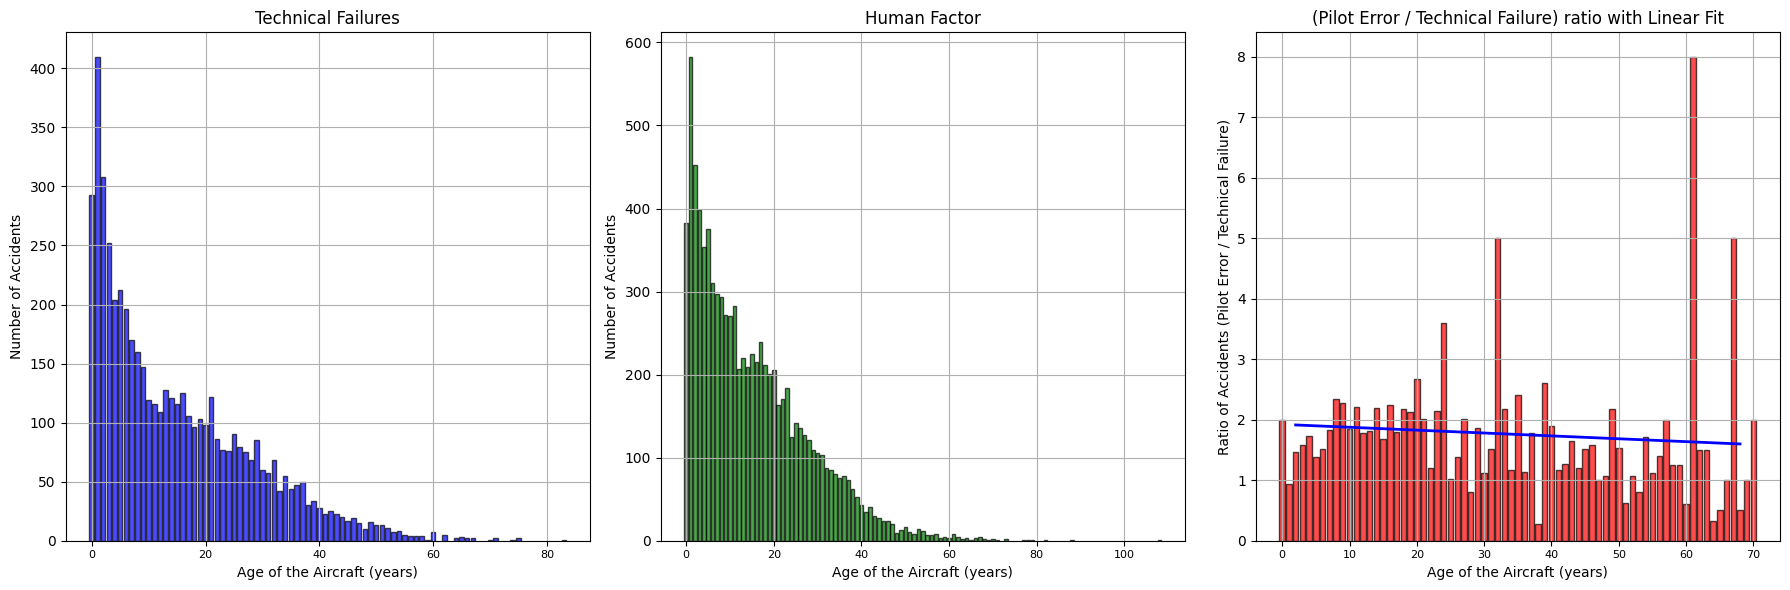

In [8]:
def read_csv_data(file_path, crash_cause):
    ages = {}
    with open(file_path, 'rt', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Crash cause'] == crash_cause and row['YOM']:
                try:
                    year_of_manufacture = int(row['YOM'])
                    crash_date = datetime.strptime(row['Date'], "%Y-%m-%d %H:%M:%S").year
                    age = crash_date - year_of_manufacture
                    if age > -1 and age < 116:
                        if age in ages:
                            ages[age] += 1
                        else:
                            ages[age] = 1
                except ValueError:
                    print("Invalid year of manufacture, skipping:", row['YOM'])
    return ages

def plot_histogram(data_dict, title, color):
    keys = list(data_dict.keys())
    values = list(data_dict.values())
    
    plt.bar(keys, values, color=color, edgecolor='black', alpha=0.7)
    plt.xlabel('Age of the Aircraft (years)')
    plt.ylabel('Number of Accidents')
    plt.title(title)
    plt.grid(True)
    #plt.show()

def plot_ratio(human_data_dict, technical_data_dict):
    # Convert dictionary values to lists
    human_data = list(human_data_dict.values())
    technical_data = list(technical_data_dict.values())

    # Trim both arrays to the minimum length
    min_length = min(len(human_data), len(technical_data))
    human_data = human_data[:min_length]
    technical_data = technical_data[:min_length]

    # Convert data to float arrays
    human_data = np.array(human_data).astype(float)
    technical_data = np.array(technical_data).astype(float)
    
    # Calculate ratio, handle division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio_data = np.where(technical_data != 0, human_data / technical_data, np.nan)

    # Plot histogram
    plot_histogram({i: ratio_data[i] for i in range(len(ratio_data))}, 'Ratio of Accidents (Pilot Error / Technical Failure)', 'r')

    # Calculate the average ratio for each group of points
    window_size = 5  # Define the size of the window for averaging
    smoothed_ratio = np.convolve(ratio_data, np.ones(window_size) / window_size, mode='valid')

    # Fit a linear function to the data
    x = np.arange(window_size // 2, len(smoothed_ratio) + window_size // 2)
    slope, intercept = np.polyfit(x, smoothed_ratio, 1)

    # Plot the linear fit
    plt.plot(x, slope * x + intercept, color='blue', linestyle='-', linewidth=2)

    plt.xlabel('Age of the Aircraft (years)')
    plt.ylabel('Ratio of Accidents (Pilot Error / Technical Failure)')
    plt.title('(Pilot Error / Technical Failure) ratio with Linear Fit')
    plt.grid(True)
    #plt.show()

plt.figure(figsize=(18, 6))

technical_data = read_csv_data(PlaneCrashes, "Technical failure")
human_data = read_csv_data(PlaneCrashes, "Human factor")

plt.subplot(1, 3, 1)
plot_histogram(technical_data, 'Technical Failures', 'b')

plt.subplot(1, 3, 2)
plot_histogram(human_data, 'Human Factor', 'g')

plt.subplot(1, 3, 3)
plot_ratio(human_data, technical_data)

plt.tight_layout()
#plt.show()


### 8. Ali so določeni operatorji ali države bolj nagnjeni k nesrečam, in če da, zakaj?

### 9. Ali imajo določeni kraji nesreče (ocean, letališče itd.) večjo možnost preživetja?

### 10. Ali ima posadka večjo možnost preživetja kot običajni potniki na komercialnih letalih?